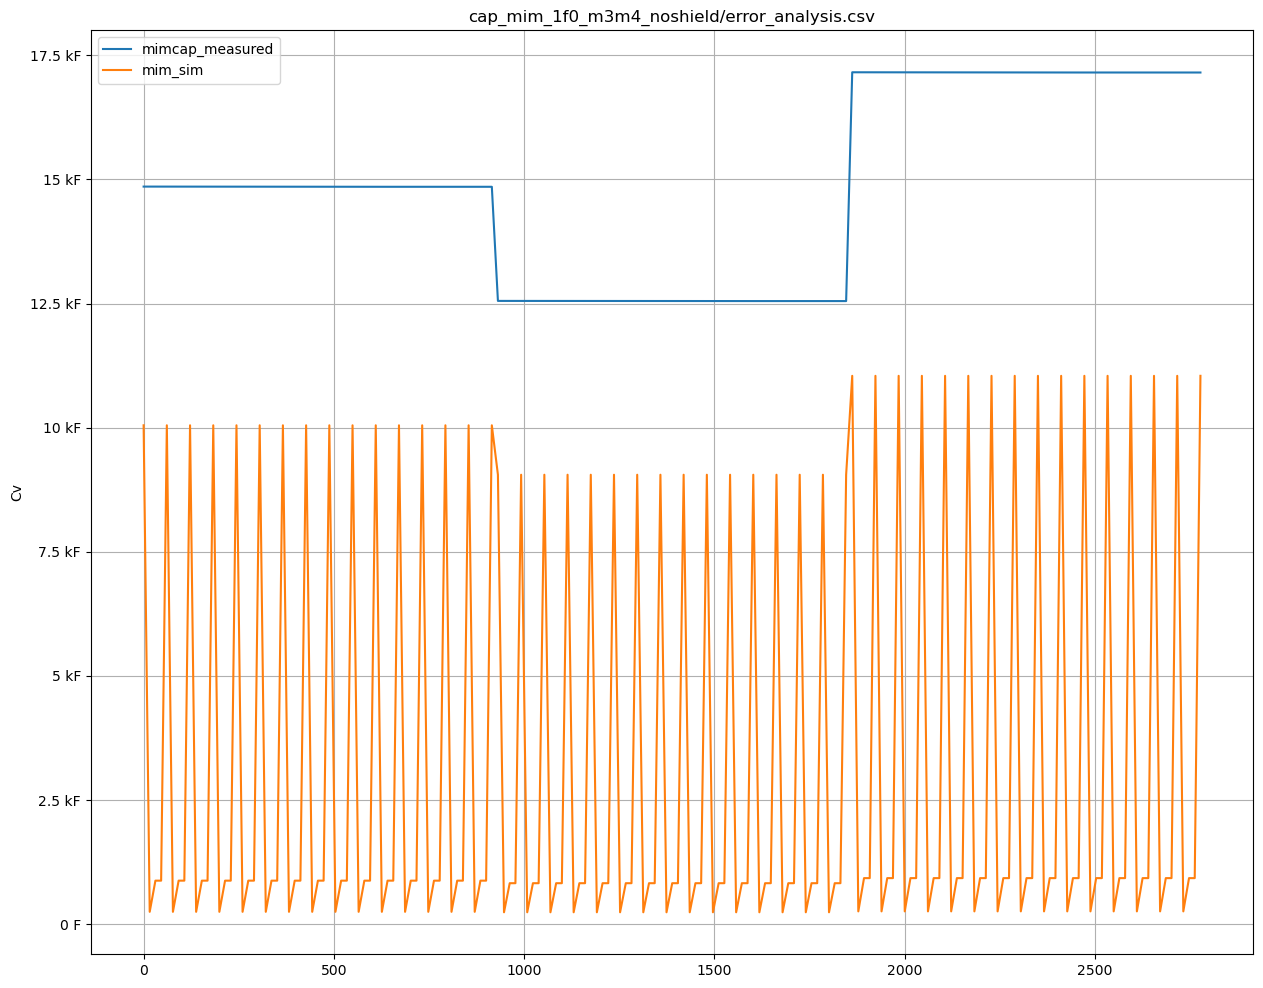

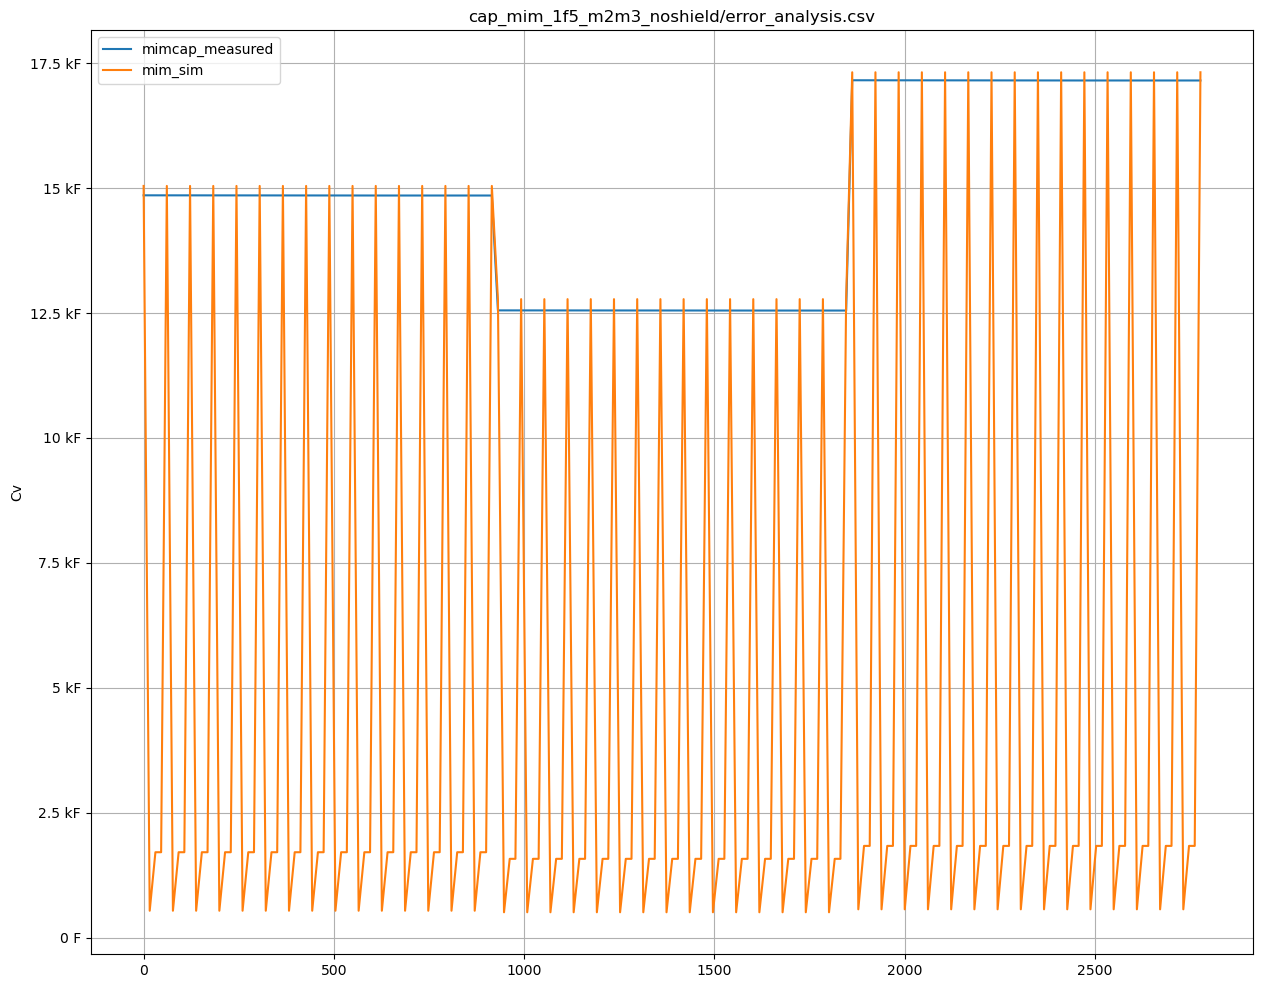

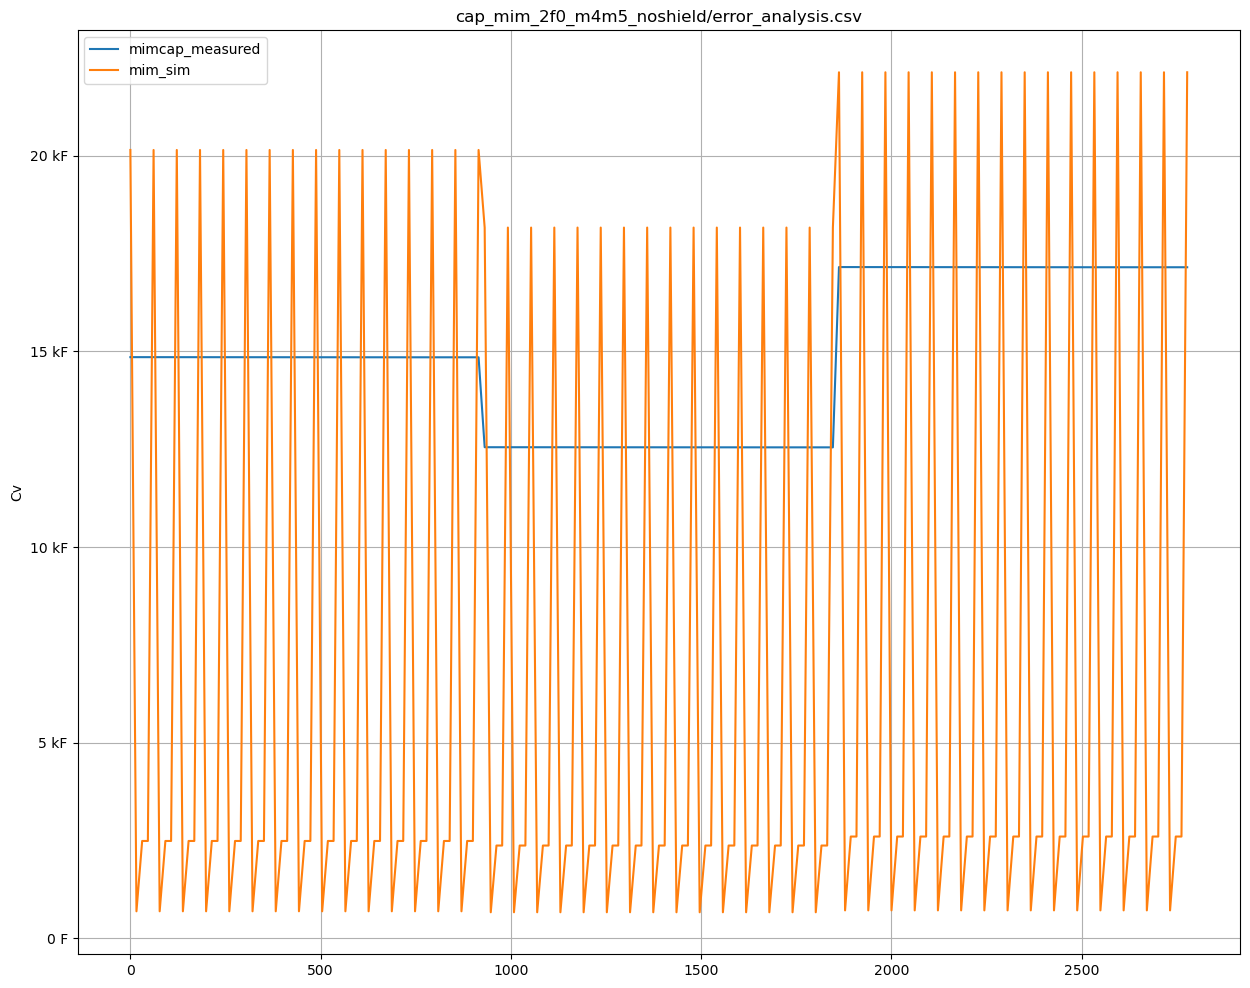

In [7]:
import os
import pandas as pd
import glob
from matplotlib import pyplot as plt
from matplotlib.ticker import EngFormatter


def draw(measured: list[str]) -> None:
    """draw func draw measured data vs simulated data

    Args:
        measured (list[str]): measured files paths
    """

    measured.sort()
    for i in range(len(measured)):
        space = measured[i].find("/")
        read_dev_name = measured[i][space + 1:]
        df = pd.read_csv(measured[i])
        df.drop_duplicates(subset=df.columns[5], inplace=True)
        ax=df.plot(y=[df.columns[5], df.columns[7]], figsize=(15,12))
        amp_formatter = EngFormatter(unit='F')
        ax.yaxis.set_major_formatter(amp_formatter)

        plt.title(read_dev_name)
        plt.grid()
        plt.ylabel('Cv')
        plt.show()

measured = glob.glob(f"mimcap_regr/*/*.csv")
# caling the draw func
draw(measured)
